# Обучение с учителем: классификация

Вспомним, где находится классификация на нашей карте машинного обучения:

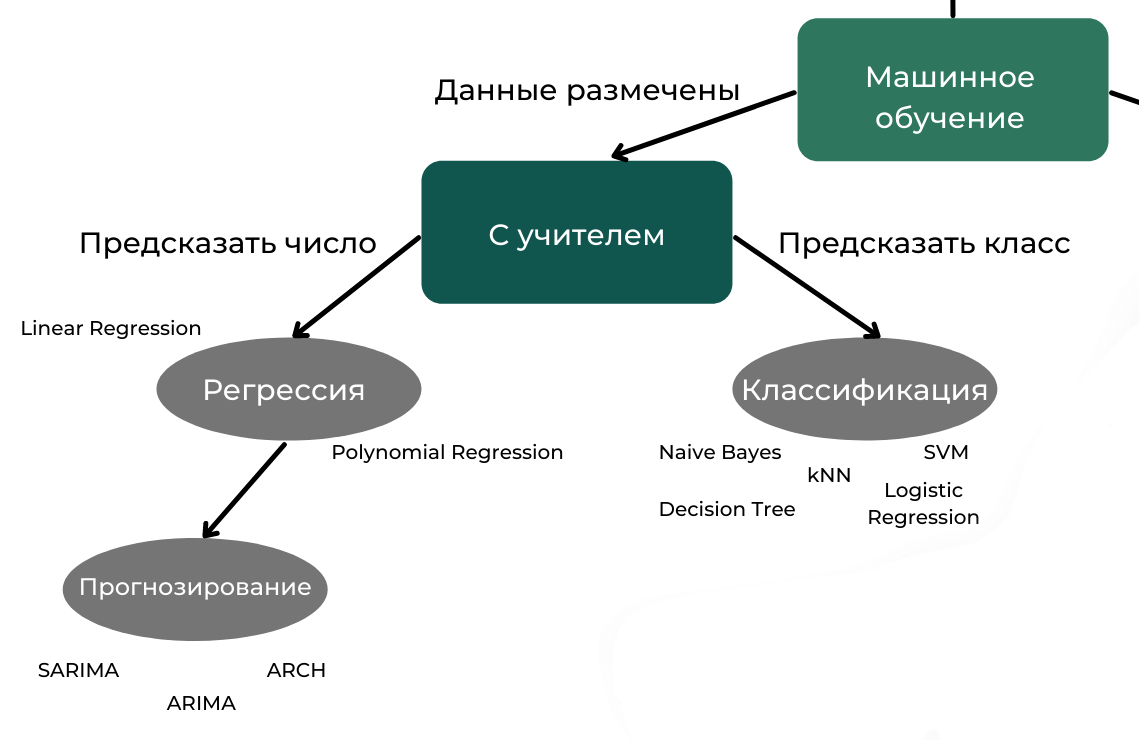

Вначале мы снова обратимся к классу линейных моделей и рассмотрим **логистическую регрессию**. Затем поговорим о **деревьях решений** для задачи классификации и научимся строить из этих деревьев целый лес.

## <center> Логистическая регрессия

Bспомним, что такое классификация.

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

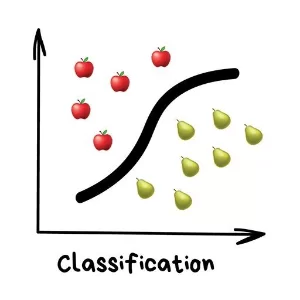

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**. Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

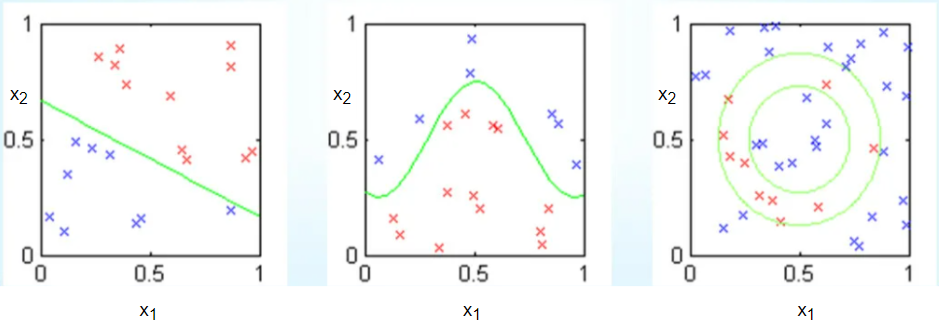

Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

$\hat y = w_0 + w_1x_1 + w_2x_2 + ... + w_mx_m = w_0 + \sum \limits^m_{j=1} w_jx_j$ 

В общем случае это уравнение гиперплоскости, которая стремится приблизить зависимость целевой переменной от $m$ факторов.

* Когда фактор всего один, уравнение задаёт прямую:

$\hat y = w_0 + w_1x$
* Когда факторов два, уравнение задаёт плоскость:

$\hat y = w_0 + w_1x_1 + w_2x_2$

Но всё это работает только в том случае, когда целевой признак $y$, который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак $y$ является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за $y=1$ (Спам) и $y=0$ (Не спам) и обучить линейную регрессию предсказывать 0 и 1.

Но результат будет очень плохим. Выглядеть это будет примерно так:

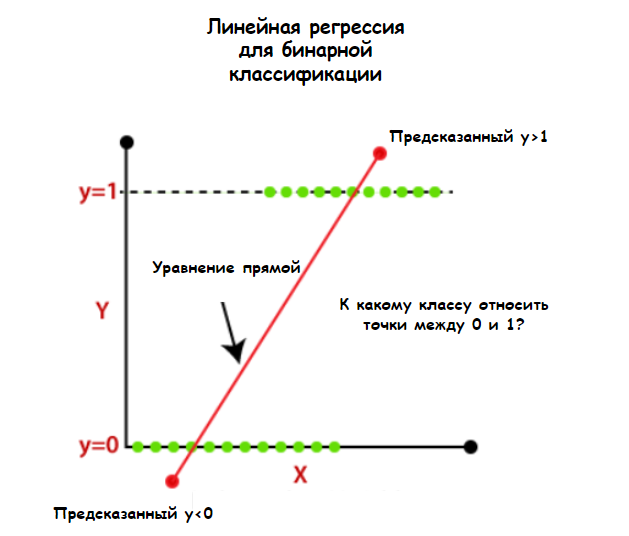

Для больших значений $x$ прямая будет выдавать значения больше 1, а для очень маленьких — меньше 0. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность $P$, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как $Q=1-P$.  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен 0.5. То есть если вероятность $P> 0.5$, мы будем считать письмо спамом, а если $P \leq 0.5$ — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне [0, 1]. А это уже знакомая нам задача регрессии.

Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от $- \infty$ до $+ \infty$? 

Тут-то мы и приходим к модели логистической регрессии — регрессии вероятностей.

## <center> ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция *(logistic function)* $ \sigma (z)$ — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**. Записывается она следующим образом:

$ \sigma (z) = {1 \over {1+e^{-z}}}$

А вот график её зависимости от аргумента $z$:

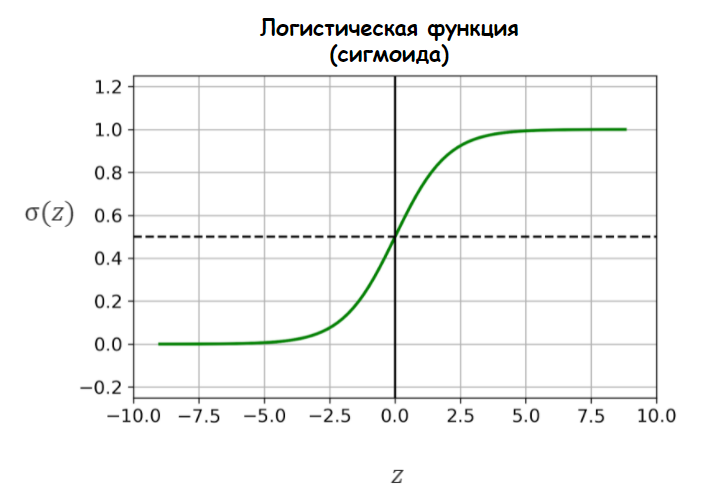

**В чём преимущество этой функции?**

У сигмоиды есть два очень важных для нас свойства:

* Значения сигмоиды $ \sigma (z)$ лежат в диапазоне от 0 до 1 при любых значения аргумента $z$: какой бы $z$ вы ни подставили, число меньше 0 или больше 1 вы не получите.
* Сигмоида выдаёт значения $ \sigma (z) > 0.5$ при её аргументе $z > 0$, $ \sigma (z) < 0.5$ — при $z < 0$ и $ \sigma (z) = 0.5$ — при $z=0$.

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за $z$)

$z =  w_0 + \sum \limits^m_{j=1} w_jx_j$ 

и подставим выход модели $z$ в функцию сигмоиды, чтобы получить искомые оценки вероятности (в математике принято писать оценочные величины с «шапкой» наверху, а истинные значения — без «шапки», это чистая формальность):

$ \hat P = \sigma (z) = {1 \over {1+e^{-z}}} = {1 \over {1 + e^{- w_0 - \sum \nolimits^m_{j=1} w_jx_j}}} = {1 \over e^{- \overline w \cdot \overline x}}$

Примечание. Далее мы будем называть оценки вероятности $ \hat P$ просто вероятностью, но только для краткости. Это не значит, что эти оценки являются истинными вероятностями принадлежности к каждому из классов (их нельзя сосчитать, так как для этого нужна выборка бесконечного объёма). Если вы употребляете термин «вероятности» на собеседованиях, обязательно предварительно укажите, что вы подразумеваете оценку вероятности.

Обучать будем всё в совокупности, пытаясь получить наилучшую оценку вероятности $ \hat P$. Если вероятность $ \hat P > 0.5$, относим объект к классу 1, а если $ \hat P \leq 0.5$, относим объект к классу 0. 

Математически это записывается следующей формулой:



